In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from imblearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [85]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('creditcard.csv')

In [86]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [88]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [90]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [91]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [92]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [93]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [94]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [95]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [96]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [97]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [98]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [100]:
print(X.shape, x_train.shape, x_test.shape)

(284807, 30) (227845, 30) (56962, 30)


Logistic Regression

In [101]:
model = LogisticRegression()

In [102]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

LogisticRegression()

In [103]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_prediction, y_train)

In [104]:
print('Accuracy on Training data : ', x_train_accuracy)

Accuracy on Training data :  0.9989247075862977


In [105]:
# accuracy on test data
#### high doubt in this (we get y_pred after applying applying algo on x_test)
y_preds = model.predict(x_test)
test_data_accuracy = accuracy_score(y_preds, y_test)

In [106]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9990519995786665


In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.64      0.70        98

    accuracy                           1.00     56962
   macro avg       0.88      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### Method 1: Undersampling

In [108]:
# Class count
count_class_0, count_class_1 = df.Class.value_counts()

# Divide by class
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

In [109]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


In [110]:
X = df_test_under.drop('Class',axis='columns')
y = df_test_under['Class']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [111]:
# Number of classes in training Data
y_train1.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [112]:
model.fit(X_train1, y_train1)

LogisticRegression()

In [113]:
y_preds1 = model.predict(X_test1)
test_data_accuracy = accuracy_score(y_preds1, y_test1)

In [114]:
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.97      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### Method2: Oversampling

In [115]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


In [116]:
X = df_test_over.drop('Class',axis='columns')
y = df_test_over['Class']

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [117]:
# Number of classes in training Data
y_train2.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [118]:
model.fit(X_train2, y_train2)

LogisticRegression()

In [119]:
y_preds2 = model.predict(X_test2)
test_data_accuracy = accuracy_score(y_preds2, y_test2)

In [120]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.96      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



### Method3: SMOTE

In [121]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [124]:
# Number of classes in training Data
y_train3.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [125]:
model.fit(X_train3, y_train3)

LogisticRegression()

In [126]:
y_preds3 = model.predict(X_test3)
test_data_accuracy = accuracy_score(y_preds3, y_test3)

In [127]:
print(classification_report(y_test3, y_preds3))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



###Method 5 : Borderline SMOTE 1

In [128]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [129]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X, y)

y_bs.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_bs, y_bs, test_size=0.2, random_state=15, stratify=y_bs)

In [131]:
# Number of classes in training Data
y_train5.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [132]:
model.fit(X_train5, y_train5)

LogisticRegression()

In [133]:
y_preds5 = model.predict(X_test5)
test_data_accuracy = accuracy_score(y_preds5, y_test5)

In [134]:
print(classification_report(y_test5, y_preds5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



###Method 6: Borderline SMOTE 2

In [135]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [136]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-2')
X_bsm, y_bsm = bsmote.fit_resample(X, y)

y_bsm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_bsm, y_bsm, test_size=0.2, random_state=15, stratify=y_bsm)

In [138]:
# Number of classes in training Data
y_train6.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [139]:
model.fit(X_train6, y_train6)

LogisticRegression()

In [140]:
y_preds6 = model.predict(X_test6)
test_data_accuracy = accuracy_score(y_preds6, y_test6)

In [141]:
print(classification_report(y_test6, y_preds6))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56863
           1       0.99      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



###Method 7 : SVMSmote

In [142]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [143]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)
X_svm, y_svm = svmsmote.fit_resample(X, y)

y_svm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=15, stratify=y_svm)

In [145]:
y_train7.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [146]:
model.fit(X_train7, y_train7)

LogisticRegression()

In [147]:
y_preds7 = model.predict(X_test7)
test_data_accuracy = accuracy_score(y_preds7, y_test7)

In [148]:
print(classification_report(y_test7, y_preds7))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



###Method 8 : ADASYN

In [149]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [150]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state = 42)
X_ada, y_ada = ada.fit_resample(X, y)

y_ada.value_counts()

0    284315
1    284298
Name: Class, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_ada, y_ada, test_size=0.2, random_state=15, stratify=y_ada)

In [152]:
y_train8.value_counts()

0    227452
1    227438
Name: Class, dtype: int64

In [153]:
model.fit(X_train8, y_train8)

LogisticRegression()

In [154]:
y_preds8 = model.predict(X_test8)
test_data_accuracy = accuracy_score(y_preds8, y_test8)

In [155]:
print(classification_report(y_test8, y_preds8))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56860

    accuracy                           0.97    113723
   macro avg       0.97      0.97      0.97    113723
weighted avg       0.97      0.97      0.97    113723



###Method 9 : SMOTEENN

In [74]:
from imblearn.combine import SMOTEENN

In [75]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [76]:
enn = SMOTEENN(sampling_strategy='minority',random_state = 42)
X_smt, y_smt = enn.fit_resample(X, y)

y_smt.value_counts()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [ ]:
y_train9.value_counts()

In [ ]:
model.fit(X_train9, y_train9)

In [ ]:
y_preds9 = model.predict(X_test9)
test_data_accuracy = accuracy_score(y_preds9, y_test9)

In [ ]:
print(classification_report(y_test9, y_preds9))

###Method 10 : SMOTETomek

In [77]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [78]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(sampling_strategy='minority',random_state = 42)
X_smtt, y_smtt = smotetomek.fit_resample(X, y)

y_smtt.value_counts()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_smtt, y_smtt, test_size=0.2, random_state=15, stratify=y_smtt)

In [ ]:
y_train10.value_counts()

In [ ]:
model.fit(X_train9, y_train9)

In [ ]:
y_preds10 = model.predict(X_test10)
test_data_accuracy = accuracy_score(y_pred10, y_test10)

In [ ]:
print(classification_report(y_test10, y_preds10))

###Confusion Matrix for all algorithms

In [82]:
import seaborn as sn 



Linear Regression Algotithm
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.64      0.70        98

    accuracy                           1.00     56962
   macro avg       0.88      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962

1 : Undersampling
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.97      0.93      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

2 : Oversampling
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.96      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted av

Text(69.0, 0.5, 'Truth')

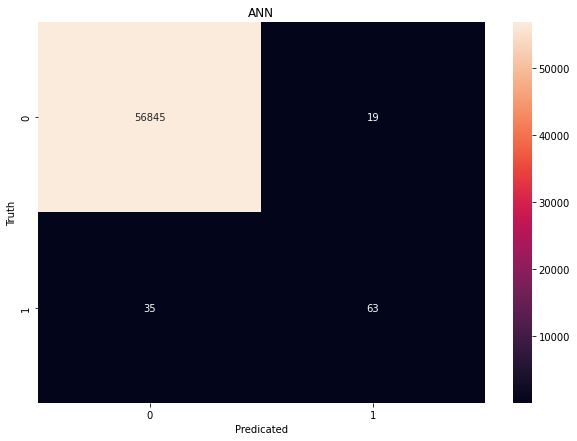

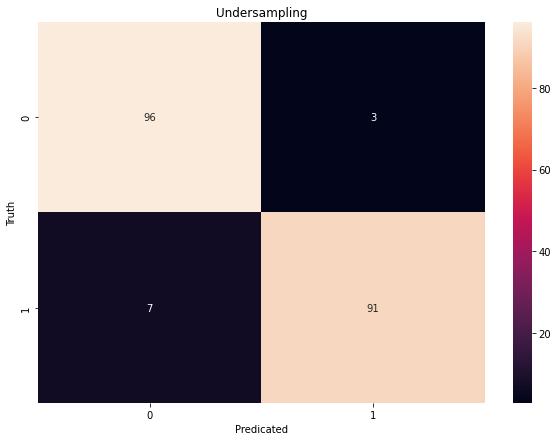

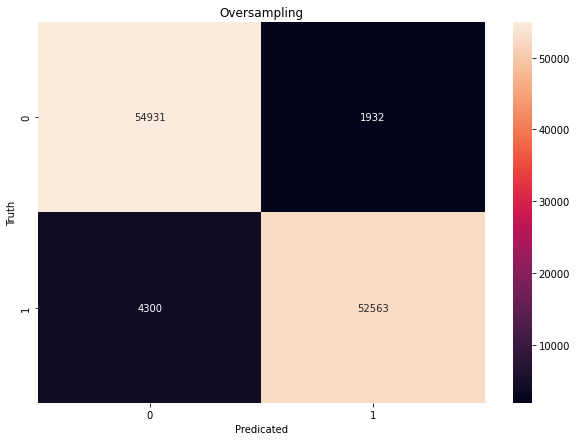

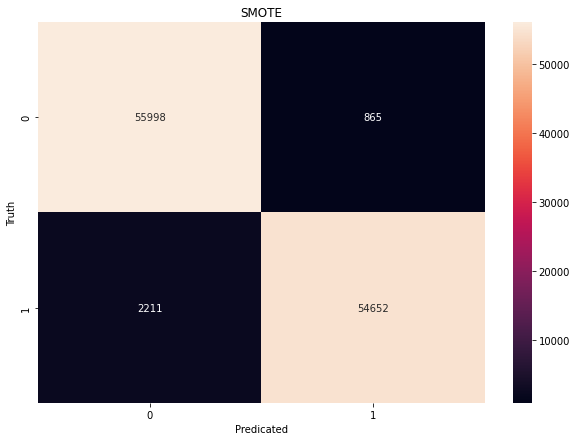

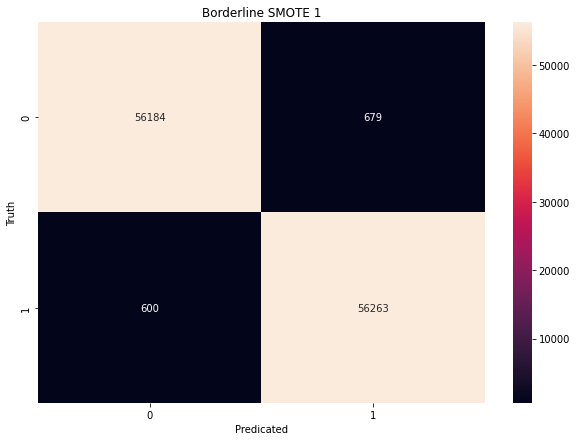

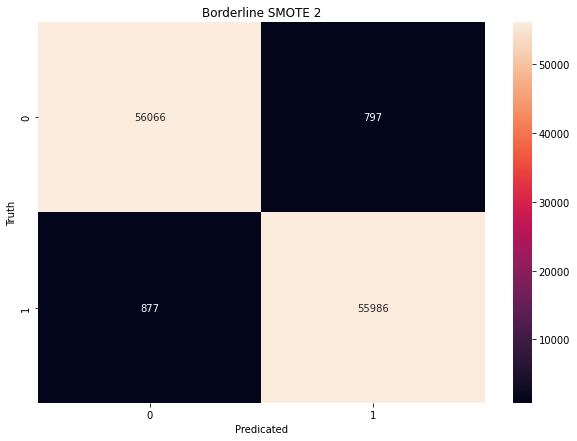

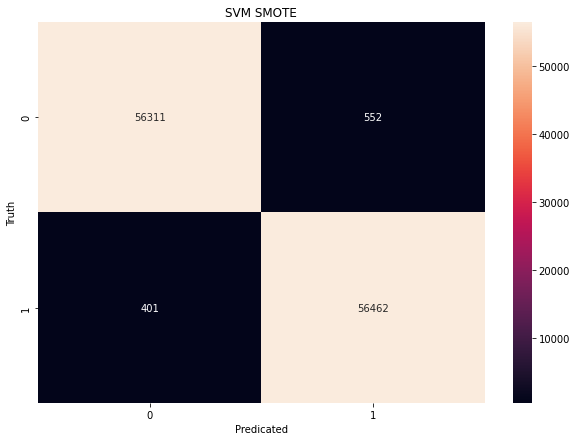

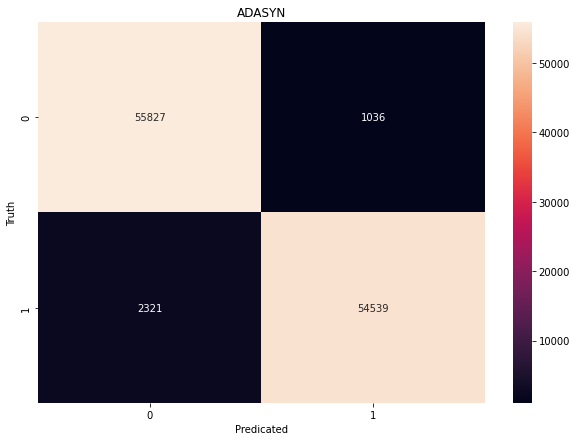

In [156]:
print("Linear Regression Algotithm")
print(classification_report(y_test, y_preds))
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ANN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("1 : Undersampling")
print(classification_report(y_test1, y_preds1))
cm=tf.math.confusion_matrix(labels=y_test1,predictions=y_preds1)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Undersampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("2 : Oversampling")
print(classification_report(y_test2, y_preds2))
cm=tf.math.confusion_matrix(labels=y_test2,predictions=y_preds2)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Oversampling')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("3 : SMOTE")
print(classification_report(y_test3, y_preds3))
cm=tf.math.confusion_matrix(labels=y_test3,predictions=y_preds3)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

# print("4 : Ensemble with Undersampling")
# print(classification_report(y_test4, y_pred_final))
# cm=tf.math.confusion_matrix(labels=y_test4,predictions=y_pred_final)
# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.title('Ensemble with Undersampling')
# plt.xlabel('Predicated')
# plt.ylabel('Truth')

print("5 : Borderline SMOTE 1")
print(classification_report(y_test5, y_preds5))
cm=tf.math.confusion_matrix(labels=y_test5,predictions=y_preds5)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 1')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("6 : Borderline SMOTE 2")
print(classification_report(y_test6, y_preds6))
cm=tf.math.confusion_matrix(labels=y_test6,predictions=y_preds6)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('Borderline SMOTE 2')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("7 : SVM SMOTE")
print(classification_report(y_test7, y_preds7))
cm=tf.math.confusion_matrix(labels=y_test7,predictions=y_preds7)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('SVM SMOTE')
plt.xlabel('Predicated')
plt.ylabel('Truth')

print("8 : ADASYN ")
print(classification_report(y_test8, y_preds8))
cm=tf.math.confusion_matrix(labels=y_test8,predictions=y_preds8)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title('ADASYN')
plt.xlabel('Predicated')
plt.ylabel('Truth')

# print("9 : SMOTEENN ")
# print(classification_report(y_test9, y_preds9))
# cm=tf.math.confusion_matrix(labels=y_test9,predictions=y_preds9)
# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.title('SMOTEENN')
# plt.xlabel('Predicated')
# plt.ylabel('Truth')

# print("10 : SMOTETOMEK ")
# print(classification_report(y_test10, y_preds10))
# cm=tf.math.confusion_matrix(labels=y_test10,predictions=y_preds10)
# plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
# plt.title('SMOTETOMEK')
# plt.xlabel('Predicated')
# plt.ylabel('Truth')